In [43]:
import importlib
import utils
import visualization

importlib.reload(utils)
importlib.reload(visualization)
%reload_ext autoreload
%autoreload 2
from utils import *
from visualization import visualize, graficar_distribucion_productos

pd.set_option('display.max_colwidth', None)


In [44]:
excel_path = "/home/viktoria/Downloads/ARBOLES ALIMENTOS EJERCICIO KABELLI.xlsx"
# all data
df_all = load_all_sheets(excel_path)
print("Number os samples in the dataset:", df_all.shape[0])

Number os samples in the dataset: 2381


In [124]:
total_count_products = (
    df_all.groupby('Sheet')
    .size()
    .reset_index(name='Product Count')
)
total_count_products

,Sheet,Product Count
0,PRISA Arbol_24_25,587
1,Prilogic Arbol_24_25,265
2,Prinorte Arbol_24_25,183
3,Prisur Arbol_24_25,602
4,Surtiventas Arbol_24_25,744


In [146]:


def find_internal_duplicates(df):
    """
    Finds products from the same subempresa with the same SKU.
    """
    duplicates = (
        df.groupby(['Sheet', 'SKU', 'Nombre SKU'])
        .filter(lambda x: len(x) > 1)
        .sort_values(['Sheet', 'SKU'])
    )
    return duplicates.reset_index(drop=True)

In [46]:
# Duplicados - los productos con el mismo SKU dentro de una subempresa

In [147]:
duplicates = find_internal_duplicates(df_all)
print(f"Number of duplicates: {duplicates.shape[0]}")

Number of duplicates: 58


In [148]:
duplicates.head(30)
# solo con nombres iguales
# no contar dos veces el mismo producto

,Marca,Nombre SKU,SKU,Sheet
0,GALLETA COSTA TUAREG 120 GR.,GALLETA COSTA TUAREG 120 GR.,10243,Prilogic Arbol_24_25
1,GALLETA COSTA TUAREG 120 GR.,GALLETA COSTA TUAREG 120 GR.,10243,Prilogic Arbol_24_25
2,ACEITE COCINA 1 LT. MARAVILLA CHEF.,ACEITE COCINA 1 LT. MARAVILLA CHEF.,12599,Prilogic Arbol_24_25
3,ACEITE COCINA 1 LT. MARAVILLA CHEF.,ACEITE COCINA 1 LT. MARAVILLA CHEF.,12599,Prilogic Arbol_24_25
4,GALLETA ARCOR BOCADITOS 300 GR DULCE/MEMBR HOLANDA,GALLETA ARCOR BOCADITOS 300 GR DULCE/MEMBR HOLANDA,14266,Prilogic Arbol_24_25
5,GALLETA ARCOR BOCADITOS 300 GR DULCE/MEMBR HOLANDA,GALLETA ARCOR BOCADITOS 300 GR DULCE/MEMBR HOLANDA,14266,Prilogic Arbol_24_25
6,GALLETA DOS EN UNO SURTIDAS 400 GR,GALLETA DOS EN UNO SURTIDAS 400 GR,14268,Prilogic Arbol_24_25
7,GALLETA DOS EN UNO SURTIDAS 400 GR,GALLETA DOS EN UNO SURTIDAS 400 GR,14268,Prilogic Arbol_24_25
8,AGUA MINERAL 500 CC BENEDICTINO S/GAS,AGUA MINERAL 500 CC BENEDICTINO S/GAS,16817,Prilogic Arbol_24_25
9,AGUA MINERAL 500 CC BENEDICTINO S/GAS,AGUA MINERAL 500 CC BENEDICTINO S/GAS,16817,Prilogic Arbol_24_25


In [49]:
unique_sheets = duplicates['Sheet'].unique()
unique_sheets = [sheet for sheet in unique_sheets if sheet != "Prilogic Arbol_24_25"]

duplicates_counts = {}

for sheet in unique_sheets:
    sub_df = duplicates[duplicates['Sheet'] == sheet]
    duplicates_counts[sheet] = sub_df.shape[0]

print(duplicates_counts)

{'PRISA Arbol_24_25': 128, 'Prinorte Arbol_24_25': 39, 'Prisur Arbol_24_25': 93, 'Surtiventas Arbol_24_25': 99}


### Busqueda de los productos iguales que tienen SKU iguales en las diferentes subempresas

In [50]:
data = load_all_sheets(excel_path)

correct_products = find_similar_products(data, 88, different_sku=False)
correct_products = correct_products.copy()
correct_products = remove_flavor_variants(correct_products)
columns_to_show = [col for col in correct_products.columns if col not in ['Numbers 1', 'Numbers 2']]
correct_products = correct_products.loc[:, columns_to_show]
exact_matches = correct_products[correct_products['Similarity'] == 100]
partial_matches = correct_products[correct_products['Similarity'] < 100]

In [51]:
# Los productos que tienen nombres iguales y SKU iguales
same_name_same_sku = exact_matches.shape[0]
print(same_name_same_sku)

234


In [52]:
exact_matches.head(5)

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity
0,DUL-SUC,ENDULZANTE DUL-SUC CON STEVIA LIQUIDO 270 ML,88250,Prinorte Arbol_24_25,ENDULZANTE DUL-SUC CON STEVIA LIQUIDO 270 ML,88250,Prisur Arbol_24_25,100
1,ONZA,ENDULZANTE ONZA 0.5 GR SUCRALOSA X 1000 SAC.PRISA,28005,PRISA Arbol_24_25,ENDULZANTE ONZA 0.5 GR SUCRALOSA X 1000 SAC.PRISA,28005,Prinorte Arbol_24_25,100
2,WATTÏS,MERMELADA 225 CC WATTS SACHET MORA,19266,Prinorte Arbol_24_25,MERMELADA 225 CC WATTS SACHET MORA,19266,Prisur Arbol_24_25,100
3,COLISEO,AZUCAR 1 KG COLISEO,22960,Surtiventas Arbol_24_25,AZUCAR 1 KG. COLISEO,22960,Prinorte Arbol_24_25,100
4,ALIANZA,PASTA FIDEO 450 GR TALLARIN ALIANZA,91538,Prinorte Arbol_24_25,PASTA FIDEO 450 GR TALLARIN ALIANZA,91538,Prisur Arbol_24_25,100


In [53]:
# Los productos que tienen nombres parecidos pero no iguales, SKU son iguales
similar_name_same_sku = partial_matches.shape[0]
print(similar_name_same_sku)

179


In [54]:
partial_matches.head(5)

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity
234,GOURMET,ESCENCIA DE PAN DE PASCUA 60 CC GOURMET,41077,Surtiventas Arbol_24_25,ESENCIA DE PAN DE PASCUA 60 CC GOURMET,41077,Prisur Arbol_24_25,99
235,GOURMET,ESCENCIA DE VAINILLA 100 CC GOURMET,41078,Surtiventas Arbol_24_25,ESENCIA DE VAINILLA 100 CC GOURMET,41078,Prisur Arbol_24_25,99
236,GOURMET,BASE P/HAMBURGUESA 90 GR X 15 UN GOURMET,41043,Surtiventas Arbol_24_25,BASE P/HAMBURGUESA 90 GR X 15 UND GOURMET,41043,Prisur Arbol_24_25,99
237,GOURMET,CONDIMENTO BICARBONATO 30 GR X 50 UN GOURMET,41021,Surtiventas Arbol_24_25,CONDIMENTO BICARBONATO 30 GR X 50 UND GOURMET,41021,Prisur Arbol_24_25,99
238,GOURMET,BASE POLLO CRISPY 80 GR X 12 UN GOURMET,41042,Surtiventas Arbol_24_25,BASE POLLO CRISPY 80 GR X 12 UND GOURMET,41042,Prisur Arbol_24_25,99


In [55]:
exact_matches_counts = count_unique_products_per_sheet(exact_matches)

In [56]:
partial_matches_counts = count_unique_products_per_sheet(partial_matches)

### Busqueda de los productos iguales que tienen diferentes SKU

In [57]:
#Busqueda de los productos iguales que tienen diferentes SKU

In [58]:
excel_path = "/home/viktoria/Downloads/ARBOLES ALIMENTOS EJERCICIO KABELLI.xlsx"

confident, needs_review = process_excel_for_duplicates(
    excel_path,
    confidence_threshold=93,
    low_confidence_threshold=85
)


In [59]:
different_sku_conf = confident.shape[0]
different_sku_conf

40

In [60]:
different_sku_review = needs_review.shape[0]
different_sku_review

37

In [61]:
confident.head(5)

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity,Numbers 1,Numbers 2
0,COLISEO,ATUN DESMENUZADO AGUA 170 GR COLISEO,97840,PRISA Arbol_24_25,ATUN DESMENUZADO AGUA 170 GR COLISEO,75969,Surtiventas Arbol_24_25,100,[170.0],[170.0]
1,COLISEO,LENTEJA 1 KG. 6 MM COLISEO,75758,Surtiventas Arbol_24_25,LENTEJA 1 KG 6 MM COLISEO,85092,Prisur Arbol_24_25,100,"[1.0, 6.0]","[1.0, 6.0]"
2,COLISEO,ATUN DESMENUZADO AGUA 170 GR COLISEO,75969,Surtiventas Arbol_24_25,ATUN DESMENUZADO AGUA 170 GR COLISEO,85102,Prisur Arbol_24_25,100,[170.0],[170.0]
3,COLISEO,AZUCAR 1 KG COLISEO,22960,Surtiventas Arbol_24_25,AZUCAR 1 KG. COLISEO,71978,Prisur Arbol_24_25,100,[1.0],[1.0]
4,COLISEO,ATUN DESMENUZADO AGUA 170 GR COLISEO,97840,PRISA Arbol_24_25,ATUN DESMENUZADO AGUA 170 GR COLISEO,85102,Prisur Arbol_24_25,100,[170.0],[170.0]


In [62]:
needs_review.head(5)
# Aparecen poductos que ya pueden ser diferentes como
#CEREAL BARRA COSTA FRUTOS ROJOS + YOGURT X 20 UDS	 -  CEREAL BARRA COSTA FRUTOS ROJOS (No tiene Yogurt)
# SALSA DE SOYA SUAVE 165 CC GOURMET -  SALSA DE SOYA SUAVE 165 CC GOURMET (tiene Sauve)
#	YERBA MATE 250 GR. SUPREMO ARGENTIN -	YERBA MATE 250 GR SUPREMO ARGENTINA NARANJA
# CAFE INST. JUAN VALDEZ 95 GR LIOFILIZADO DESCAFEIN	-  CAFE 95 GR JUAN VALDEZ INST. LIOFILIZADO
# Pero la mayoria son iguales

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity,Numbers 1,Numbers 2
0,NESCAFE,CAFE INST. NESCAFE TRADICION 400 GR POLVO TARRO,12596,PRISA Arbol_24_25,CAFE 400 GR NESCAFE TRADICIONAL POLVO TARRO,89295,Prisur Arbol_24_25,92,[400.0],[400.0]
1,WASIL,ARVEJA 340 CC. WASIL TETRA,57039,Surtiventas Arbol_24_25,ARVEJA 340 GR. WASIL TETRA,57031,Prisur Arbol_24_25,92,[340.0],[340.0]
2,NESCAFE,CAFE 420 GR NESCAFE TRADICION GRANULADO TARRO,89295,Prinorte Arbol_24_25,CAFE 420 GR NESCAFE TRADICIONAL GRANULADO,12596,Prisur Arbol_24_25,91,[420.0],[420.0]
3,GOURMET,SALSA DE SOYA 165 CC GOURMET,41058,Surtiventas Arbol_24_25,SALSA DE SOYA SUAVE 165 CC GOURMET,92370,Prisur Arbol_24_25,90,[165.0],[165.0]
4,SUPREMO,YERBA MATE 250 GR SUPREMO ARGENTINA,59287,Prinorte Arbol_24_25,YERBA MATE 250 GR SUPREMO ARGENTINA SERRANA,71291,Prisur Arbol_24_25,90,[250.0],[250.0]


In [95]:
filtered = find_normal_cases(excel_path)
filtered = filtered.rename(columns={"Sheet": "Subempresa"})
filtered = filtered.drop_duplicates()
filtered_count = filtered.shape[0]


In [96]:
filtered_count

1521

In [97]:
exact_prod = pairs_to_unique_products(exact_matches)
partial_prod = pairs_to_unique_products(partial_matches)
condident_prod = pairs_to_unique_products(confident)
need_review_prod = pairs_to_unique_products(needs_review)

In [143]:
all_different_sku = pd.concat([condident_prod, need_review_prod])
all_different_sku = all_different_sku.drop_duplicates(["Nombre SKU", "Marca", "SKU"])
all_different_sku.shape

all_different_sku_shape = count_unique_products_per_sheet(all_different_sku)

(108, 4)

In [139]:
all_different_sku

,Marca,Nombre SKU,SKU,Sheet
0,COLISEO,ATUN DESMENUZADO AGUA 170 GR COLISEO,97840,PRISA Arbol_24_25
1,COLISEO,LENTEJA 1 KG. 6 MM COLISEO,75758,Surtiventas Arbol_24_25
2,COLISEO,ATUN DESMENUZADO AGUA 170 GR COLISEO,75969,Surtiventas Arbol_24_25
3,COLISEO,AZUCAR 1 KG COLISEO,22960,Surtiventas Arbol_24_25
4,COLISEO,AZUCAR 1 KG. COLISEO,22960,Prinorte Arbol_24_25
...,...,...,...,...
39,DULCEDIA,ALFAJOR 3 CAPAS CH/ NEGRO 24 UN X 60 GR DULCEDIA,92321,Prisur Arbol_24_25
40,WASIL,PI¥AS EN CUBITOS 565 GR WASIL,52890,Prisur Arbol_24_25
41,ALCAFOOD,PURE DE PAPAS 250 GR ESTUCHE ALCAFOOD,72450,Prisur Arbol_24_25
42,IANSA,AZUCAR RUBIA 1 KG IANSA BOLSA,82942,Prisur Arbol_24_25


In [98]:

confident_counts = count_unique_products_per_sheet(confident)

In [99]:
needs_review_counts = count_unique_products_per_sheet(needs_review)

In [100]:
# En las estadísticas se muestra el número de productos únicos. (no coincidencias)

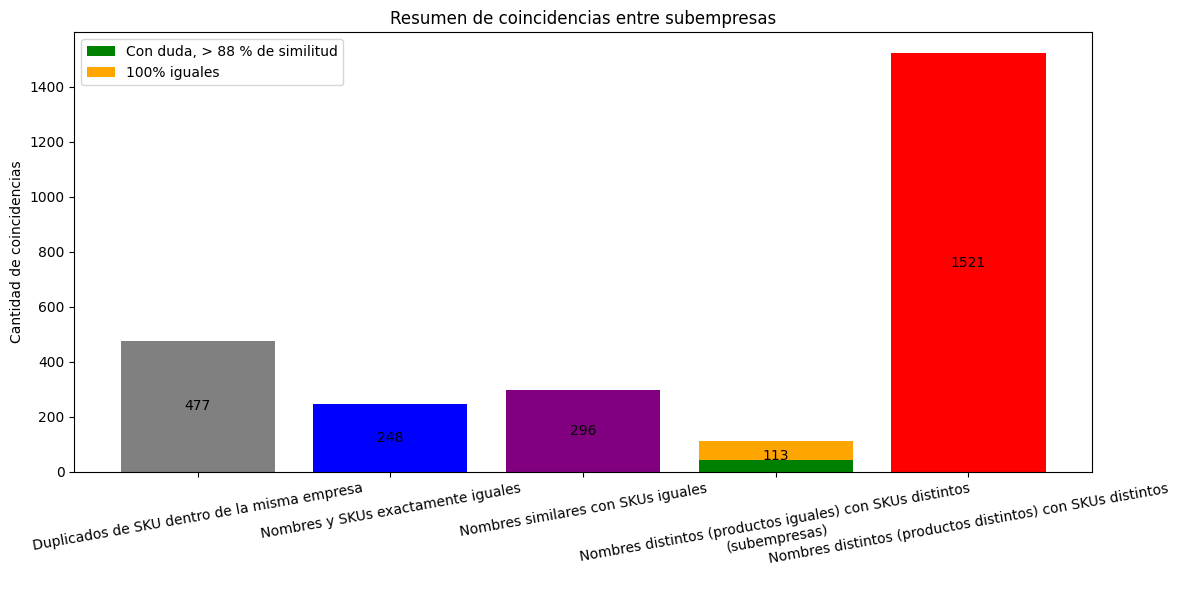

In [101]:
visualize(duplicates.shape[0], need_review_prod.shape[0], condident_prod.shape[0], exact_prod.shape[0],
          partial_prod.shape[0], filtered_count)


In [102]:
# Calculamos cuántos productos se repiten en 2, 3 o 4 empresas.
output_needs_review = count_unique_subempresas_per_product(needs_review)
output_confident = count_unique_subempresas_per_product(confident)
output_exact = count_unique_subempresas_per_product(exact_matches)
output_partial = count_unique_subempresas_per_product(partial_matches)
needs_review_stats = count_product_distribution_dict_only(output_needs_review)
confident_stats = count_product_distribution_dict_only(output_confident)
exact_matches_stats = count_product_distribution_dict_only(output_exact)
partial_matches_stats = count_product_distribution_dict_only(output_partial)


In [103]:
df = pd.DataFrame([{'Product': name, 'Number of companies where the product is present': count} for (name, _), count in
                   output_needs_review.items()])
path = "/home/viktoria/Downloads/prisa/needs_review_count.xlsx"
df.to_excel(path, index=False)

df = pd.DataFrame([{'Product': name, 'Number of companies where the product is present': count} for (name, _), count in
                   output_confident.items()])
path = "/home/viktoria/Downloads/prisa/confident_count.xlsx"
df.to_excel(path, index=False)

df = pd.DataFrame([{'Product': name, 'Number of companies where the product is present': count} for (name, _), count in
                   output_exact.items()])
path = "/home/viktoria/Downloads/prisa/exact_count.xlsx"
df.to_excel(path, index=False)

df = pd.DataFrame([{'Product': name, 'Number of companies where the product is present': count} for (name, _), count in
                   output_partial.items()])
path = "/home/viktoria/Downloads/prisa/partial_count.xlsx"
df.to_excel(path, index=False)


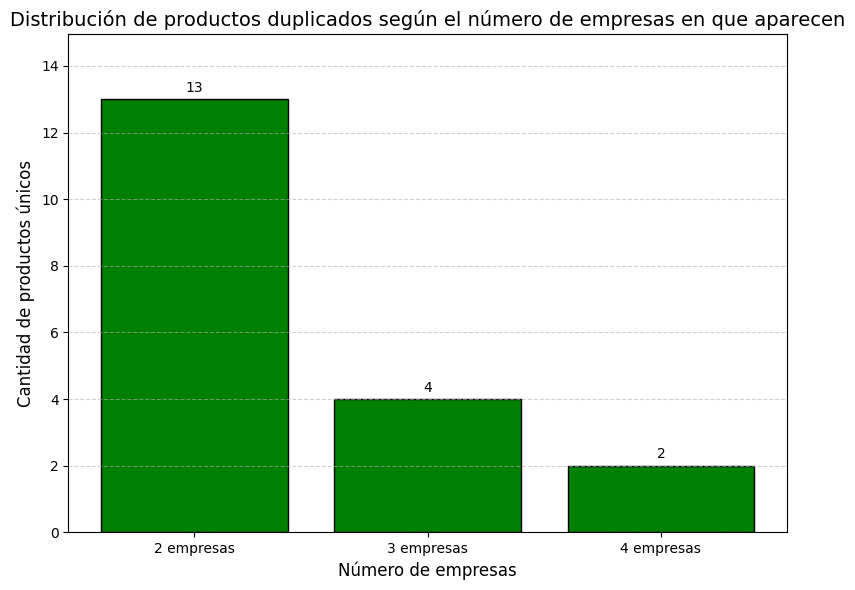

In [104]:
# Nombres distintos (productos iguales) con SKUs distintos (los casos que necesitan la revisión)
# Si por ejemplo hay producto que tiene 2 parecidos por nombres en 2 otras esmpresas todos sus 3 variaciones se cuentan como solo uno producto

graficar_distribucion_productos(needs_review_stats, "green")

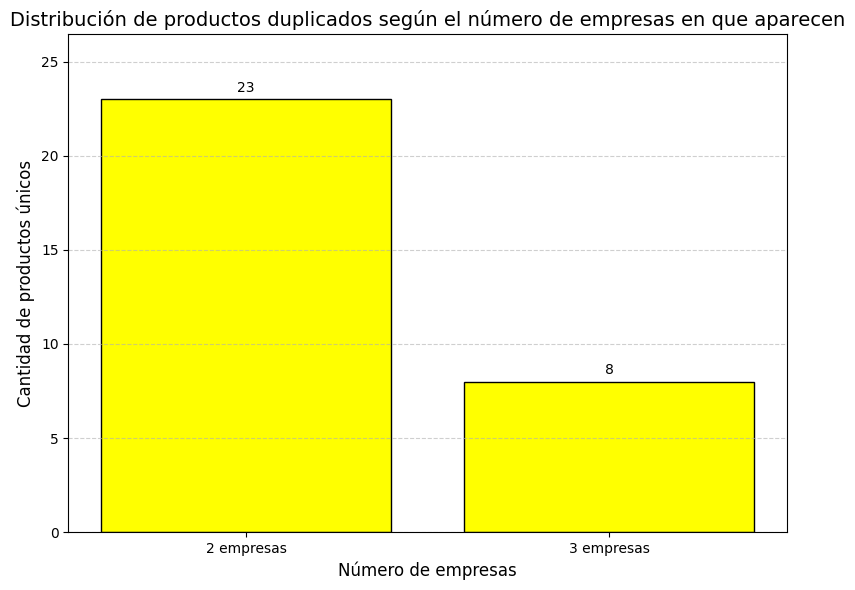

In [105]:
#Nombres distintos (productos iguales) con SKUs distintos (los casos seguros)
graficar_distribucion_productos(confident_stats, "yellow")


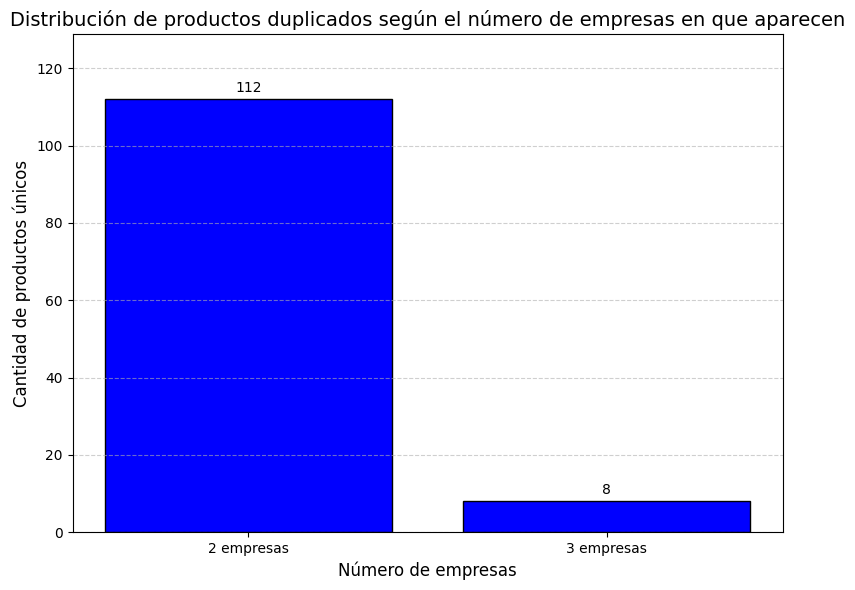

In [106]:
# Nombres y SKUs exactamente iguales
graficar_distribucion_productos(exact_matches_stats, "blue")

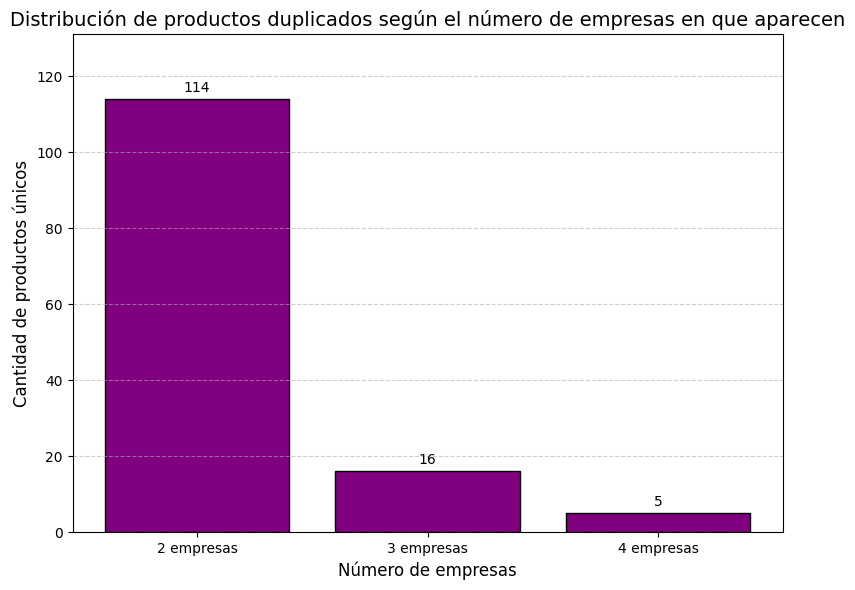

In [107]:
# Nombres similares con SKUs iguales
graficar_distribucion_productos(partial_matches_stats, "purple")

In [108]:
unique_sheets = filtered['Subempresa'].unique()
unique_sheets = [sheet for sheet in unique_sheets if sheet != "Prilogic Arbol_24_25"]

filtered_counts = {}

for sheet in unique_sheets:
    sub_df = filtered[filtered['Subempresa'] == sheet]
    filtered_counts[sheet] = sub_df.shape[0]


In [109]:
filtered_counts

{'PRISA Arbol_24_25': 480,
 'Surtiventas Arbol_24_25': 429,
 'Prinorte Arbol_24_25': 92,
 'Prisur Arbol_24_25': 284}

In [110]:
needs_review_counts

{'PRISA Arbol_24_25': 10,
 'Prinorte Arbol_24_25': 5,
 'Prisur Arbol_24_25': 18,
 'Surtiventas Arbol_24_25': 17}

In [111]:
confident_counts

{'PRISA Arbol_24_25': 10,
 'Prinorte Arbol_24_25': 6,
 'Prisur Arbol_24_25': 27,
 'Surtiventas Arbol_24_25': 27}

In [112]:
duplicates_counts

{'PRISA Arbol_24_25': 128,
 'Prinorte Arbol_24_25': 39,
 'Prisur Arbol_24_25': 93,
 'Surtiventas Arbol_24_25': 99}

In [113]:
exact_matches_counts

{'PRISA Arbol_24_25': 28,
 'Prinorte Arbol_24_25': 65,
 'Prisur Arbol_24_25': 180,
 'Surtiventas Arbol_24_25': 156}

In [114]:
partial_matches_counts

{'PRISA Arbol_24_25': 38,
 'Prinorte Arbol_24_25': 37,
 'Prisur Arbol_24_25': 117,
 'Surtiventas Arbol_24_25': 123}

In [115]:
dictionaries = [exact_matches_counts, partial_matches_counts, duplicates_counts, confident_counts, needs_review_counts,
                filtered_counts]
results = dict()
for dct in dictionaries:
    for key in dct.keys():
        if not key in results.keys():
            results[key] = dct[key]
        else:
            results[key] += dct[key]


In [119]:
results

{'PRISA Arbol_24_25': 694,
 'Prinorte Arbol_24_25': 244,
 'Prisur Arbol_24_25': 719,
 'Surtiventas Arbol_24_25': 851}

In [125]:
total_count_products

,Sheet,Product Count
0,PRISA Arbol_24_25,587
1,Prilogic Arbol_24_25,265
2,Prinorte Arbol_24_25,183
3,Prisur Arbol_24_25,602
4,Surtiventas Arbol_24_25,744


{0: 'PRISA Arbol_24_25',
 1: 'Prilogic Arbol_24_25',
 2: 'Prinorte Arbol_24_25',
 3: 'Prisur Arbol_24_25',
 4: 'Surtiventas Arbol_24_25'}

In [122]:

dictionaries = [
    duplicates_counts,
    exact_matches_counts,
    partial_matches_counts,
    confident_counts,
    needs_review_counts,
    filtered_counts,
    results
]

column_names = [
    "Duplicates",
    "Exact Matches",
    "Partial Matches",

    "Confident",
    "Needs Review",
    "Unique Products",
    "Total"
]

df = pd.DataFrame(dictionaries, index=column_names).T.fillna(0).astype(int)
df.index.name = "Company"

df
# explicaciones para cada categoria
# Need review + Confident

,Duplicates,Exact Matches,Partial Matches,Confident,Needs Review,Unique Products,Total
Company,,,,,,,
PRISA Arbol_24_25,128,28,38,10,10,480,694
Prinorte Arbol_24_25,39,65,37,6,5,92,244
Prisur Arbol_24_25,93,180,117,27,18,284,719
Surtiventas Arbol_24_25,99,156,123,27,17,429,851


In [144]:
total_count_products

,Sheet,Product Count
0,PRISA Arbol_24_25,587
1,Prilogic Arbol_24_25,265
2,Prinorte Arbol_24_25,183
3,Prisur Arbol_24_25,602
4,Surtiventas Arbol_24_25,744


In [128]:
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

excel_path = "Products for each company.xlsx"
df.to_excel(excel_path, index=False)
column_colors = {
    "Duplicates": "A52A2A",       # Brown
    "Exact Matches": "87CEEB",    # Blue
    "Partial Matches": "9370DB",  # Purple
    "Confident": "90EE90",        # Green
    "Needs Review": "FFFF99",     # Yellow
    "Unique Products": "FF7F7F"   # Red
}

wb = load_workbook(excel_path)
ws = wb.active
header = [cell.value for cell in ws[1]]
for col_name, color in column_colors.items():
    if col_name in header:
        col_idx = header.index(col_name) + 1
        fill = PatternFill(start_color=color, end_color=color, fill_type="solid")
        for row in range(2, ws.max_row + 1):  # Skip header (row 1)
            ws.cell(row=row, column=col_idx).fill = fill

wb.save(excel_path)

In [249]:
needs_review.loc[needs_review["SKU 1"] == 11484]

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity,Numbers 1,Numbers 2
20,LIPTON,TE DP X 100 BOL LIPTON YELLOW LABEL,11484,Surtiventas Arbol_24_25,TE LIPTON YELLOW LABEL X 100 BOLSITAS,71075,Prisur Arbol_24_25,89,[100.0],[100.0]


In [250]:
confident.loc[confident["SKU 1"] == 11484]

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity,Numbers 1,Numbers 2
36,LIPTON,TE DP X 100 BOL LIPTON YELLOW LABEL,11484,Surtiventas Arbol_24_25,TE LIPTON YELLOW LABEL X 100 BL,71075,Prinorte Arbol_24_25,94,[100.0],[100.0]


In [255]:
needs_review.loc[needs_review["SKU 1"] == 41058]

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity,Numbers 1,Numbers 2
3,GOURMET,SALSA DE SOYA 165 CC GOURMET,41058,Surtiventas Arbol_24_25,SALSA DE SOYA SUAVE 165 CC GOURMET,92370,Prisur Arbol_24_25,90,[165.0],[165.0]


In [256]:
exact_matches.loc[exact_matches["SKU 1"] == 41058]

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity
204,GOURMET,SALSA DE SOYA 165 CC GOURMET,41058,Surtiventas Arbol_24_25,SALSA DE SOYA 165 CC GOURMET,41058,Prisur Arbol_24_25,100
